## Question 1

The fundamental idea behind ensemble techniques is to combine multiple individual models to form a stronger and more robust model. Ensemble learning leverages the diversity of weak learners to improve prediction accuracy, stability, and generalization. Bagging (Bootstrap Aggregation) aims to reduce variance by training multiple models on random subsets of data independently and averaging their predictions. Boosting, on the other hand, focuses on reducing bias by training models sequentially, where each subsequent model corrects the errors of its predecessor. Bagging prevents overfitting, while boosting enhances performance through error correction and iterative learning.

## Question 2

Random Forest reduces overfitting by aggregating multiple decision trees trained on different random subsets of data and features. This randomness ensures that individual trees are de-correlated, preventing them from making identical errors. The model combines their predictions to produce a more stable and accurate output. Two key hyperparameters that help are: (1) n_estimators – the number of trees in the forest, where more trees improve robustness; (2) max_features – the number of features considered for each split, which introduces diversity among trees. Together, these parameters control complexity and prevent overfitting effectively.

## Question 3

Stacking is an ensemble technique that combines predictions from multiple base models (Level-0) using a meta-model (Level-1) to generate the final output. Unlike bagging and boosting, stacking does not rely on averaging or sequential learning but learns how to optimally combine predictions. The meta-model is trained using the predictions of the base learners as input. This allows it to capture complex relationships between model outputs. For example, combining logistic regression, random forest, and support vector machine outputs into a single model often yields improved accuracy and generalization across diverse datasets.

## Question 4

The Out-of-Bag (OOB) score in Random Forest is an internal validation metric used to estimate model performance without the need for a separate validation set. During training, each tree is built using a bootstrap sample (random sampling with replacement), leaving out about 37% of the data as out-of-bag samples. These OOB samples are then used to test the corresponding tree’s predictions. The OOB score is computed as the average accuracy across all such predictions. It provides an unbiased estimate of generalization performance, helping to assess model quality efficiently during training.

## Question 5

AdaBoost and Gradient Boosting are both boosting techniques but differ in how they correct errors. AdaBoost adjusts the weights of misclassified samples, giving more importance to difficult cases in subsequent iterations. Gradient Boosting, instead, fits new learners to the residual errors by minimizing a differentiable loss function using gradient descent. AdaBoost uses exponential loss, while Gradient Boosting can use various loss functions. AdaBoost works well with clean, low-noise data, whereas Gradient Boosting is more flexible and performs better with complex patterns. Both aim to reduce bias by iteratively improving weak learners.

## Question 6

CatBoost performs well on categorical features due to its unique encoding techniques that avoid extensive preprocessing. Instead of one-hot or label encoding, CatBoost uses Ordered Target Statistics and random permutations to convert categorical variables into numerical representations. This approach prevents target leakage and maintains statistical robustness. The algorithm calculates category encodings based on target distributions, reducing overfitting while preserving useful information. Additionally, CatBoost’s symmetry in tree building and efficient GPU support enhance performance and training speed. Hence, it can directly handle categorical data with minimal preprocessing and superior accuracy.

## Question 7

In [1]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
print("With Scaling Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# GridSearchCV for optimization
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)


Without Scaling Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Params: {'metric': 'manhattan', 'n_neighbors': 1}
Best Score: 0.9753333333333334


## Question 8

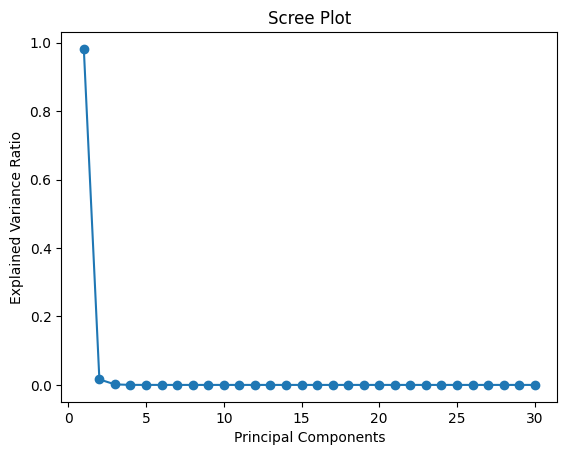

Original Accuracy: 0.9590643274853801
PCA Transformed Accuracy: 0.9532163742690059


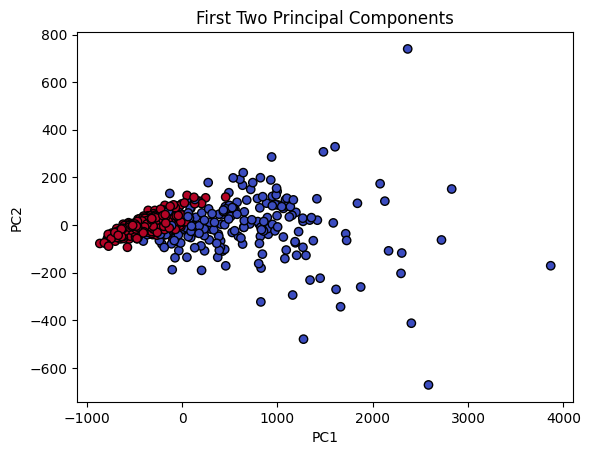

In [2]:

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

# PCA analysis
pca = PCA()
X_pca = pca.fit(X).transform(X)

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Retain 95% variance
pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X)

# Compare KNN before and after PCA
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn.fit(X_train, y_train)
print("Original Accuracy:", knn.score(X_test, y_test))

X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)
knn.fit(X_train_pca, y_train)
print("PCA Transformed Accuracy:", knn.score(X_test_pca, y_test))

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Question 9

MSE with euclidean: 3103.699882259301
MSE with manhattan: 3675.2741541435325


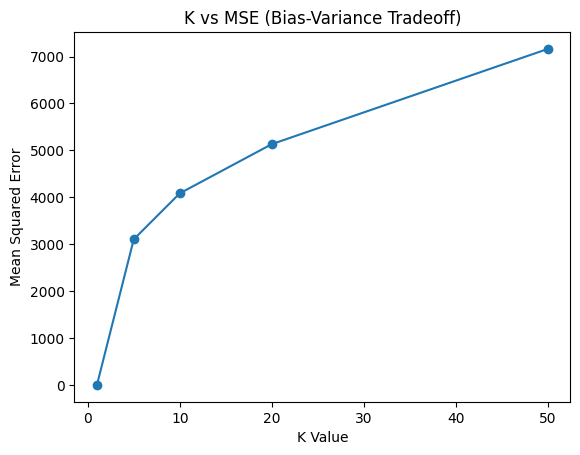

In [3]:

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Euclidean vs Manhattan
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"MSE with {metric}: {mse}")

# K vs MSE plot
mse_values = []
k_values = [1, 5, 10, 20, 50]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    mse_values.append(mean_squared_error(y, y_pred))

plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('K vs MSE (Bias-Variance Tradeoff)')
plt.show()


## Question 10

In [4]:

import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)

# KNN Imputation
imputer = KNNImputer()
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare brute, kd_tree, ball_tree
for algo in ['brute', 'kd_tree', 'ball_tree']:
    knn = KNeighborsClassifier(algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end = time.time()
    print(f"Algorithm: {algo}, Accuracy: {accuracy_score(y_test, y_pred)}, Time: {end - start:.4f} sec")


Algorithm: brute, Accuracy: 0.6883116883116883, Time: 0.0069 sec
Algorithm: kd_tree, Accuracy: 0.6883116883116883, Time: 0.0082 sec
Algorithm: ball_tree, Accuracy: 0.6883116883116883, Time: 0.0073 sec
